# Colación con Collatex

### Creación del entorno virtual de desarrollo
(to be applied outside Jupyter noteebook. In Jupyter ```pip3 install collatex Levenshtein notebook``` should be enough)


In [ ]:
!python3 -m venv collatex-venv

!source collatex-venv/bin/activate

!pip3 install collatex Levenshtein notebook

In [ ]:
!pip3 install collatex Levenshtein notebook

# Link to download .txt files:
Dossier: https://github.com/aescocasti/curso_verano_UIMP/tree/39c7639d07dfc710c8ed48bf4345cab67ccf9e4b/materiales/mi%C3%A9rcoles/transcripciones


# Upload txt files to *input_files* ↓


In [ ]:
# Creates directory for input files (.txt format without ponctuation or breaklines)
!mkdir input_files

In [ ]:
# Creates directory for output files
!mkdir output_files

In [ ]:
# Import libraries
from collatex import *
import json
import os

## Execute next block if files contain punctuation and line breaks

In [ ]:
import string
import re

# Input files to be processed
directory_path = 'input_files'

# Preprocess txt files
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # Remove punctuation, replace newline characters with spaces, and replace upper with lowercase
        content = re.sub(r'\s{2,}', ' ', content.replace('\n', ' ').translate(str.maketrans('', '', string.punctuation)).lower())

        # Save the changes on the same file
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(content)

        print(f"Processed {filename}")

Processed 08_d-III-18_222.txt
Processed 02_Washington_222.txt
Processed 06_Estocolmo_222.txt
Processed 12_Z-III-6_222.txt
Processed 01_RAE54_222.txt
Processed 11_CKB_222.txt
Processed 04_LázaroGaldiano_222.txt
Processed 05_RAE293_222.txt
Processed 07_T43-10_222.txt
Processed 10_M-II-18_222.txt
Processed 13_BNE17-10_222.txt
Processed 03_Murcia_222.txt
Processed 09_Oxford_222.txt


In [ ]:

"""
This script performs text collation on .txt files from a specified directory
and outputs the result to a CSV file.
"""

input_files_path = "input_files/"
output_files_path = "output_files/"
text_name = "collatio" #change it for your text name
collation = Collation()

# Verify input directory exists
if not os.path.exists(input_files_path):
    raise FileNotFoundError(f"Input directory {input_files_path} does not exist.")

# Verify output directory exists; if not, create it
if not os.path.exists(output_files_path):
    os.makedirs(output_files_path)

# Get list of .txt files
file_names = [f for f in os.listdir(input_files_path) if f.endswith('.txt')]
witness_names = {}

for file_name in file_names:
    try:
    # Extract witness name from file name
      witness_name = file_name
      witness_names[file_name] = witness_name
    except IndexError:
        print(f"Error extracting witness name from file {file_name}")


    # Add each witness content to the collation
    try:
        with open(os.path.join(input_files_path, file_name), encoding='utf-8') as f:
            witness_content = f.read()
            collation.add_plain_witness(witness_name, witness_content)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
# check witness name and print them
for file, witness in witness_names.items():
    print(f"File: {file} -> Witness name: {witness}")

# Perform the collationTrue
alignment_table = collate(collation, segmentation=False, layout='vertical', near_match=True, output='xml') # para la segmentación: segmentation=True y near_match=False
#print(alignment_table)
# Save the collation result to a CSV file (change the extension according to your needs –json, -xml)
try:
    with open(f"{output_files_path}collatio_{text_name}.xml", 'w', encoding='utf-8') as f:
        f.write(alignment_table)
except Exception as e:
    print(f"Error writing to output file: {e}")


File: 08_d-III-18_222.txt -> Witness name: 08_d-III-18_222.txt
File: 02_Washington_222.txt -> Witness name: 02_Washington_222.txt
File: 06_Estocolmo_222.txt -> Witness name: 06_Estocolmo_222.txt
File: 12_Z-III-6_222.txt -> Witness name: 12_Z-III-6_222.txt
File: 01_RAE54_222.txt -> Witness name: 01_RAE54_222.txt
File: 11_CKB_222.txt -> Witness name: 11_CKB_222.txt
File: 04_LázaroGaldiano_222.txt -> Witness name: 04_LázaroGaldiano_222.txt
File: 05_RAE293_222.txt -> Witness name: 05_RAE293_222.txt
File: 07_T43-10_222.txt -> Witness name: 07_T43-10_222.txt
File: 10_M-II-18_222.txt -> Witness name: 10_M-II-18_222.txt
File: 13_BNE17-10_222.txt -> Witness name: 13_BNE17-10_222.txt
File: 03_Murcia_222.txt -> Witness name: 03_Murcia_222.txt
File: 09_Oxford_222.txt -> Witness name: 09_Oxford_222.txt


# Vamos a ver algunos resultados

In [ ]:
alignment_table_vertical = collate(collation, layout='vertical', segmentation=False )
print(alignment_table_vertical)

+---------------------+-----------------------+----------------------+--------------------+------------------+-----------------+---------------------------+-------------------+-------------------+--------------------+---------------------+-------------------+-------------------+
| 08_d-III-18_222.txt | 02_Washington_222.txt | 06_Estocolmo_222.txt | 12_Z-III-6_222.txt | 01_RAE54_222.txt |  11_CKB_222.txt | 04_LázaroGaldiano_222.txt | 05_RAE293_222.txt | 07_T43-10_222.txt | 10_M-II-18_222.txt | 13_BNE17-10_222.txt | 03_Murcia_222.txt | 09_Oxford_222.txt |
+---------------------+-----------------------+----------------------+--------------------+------------------+-----------------+---------------------------+-------------------+-------------------+--------------------+---------------------+-------------------+-------------------+
|           ﻿          |           -           |           ﻿           |          ﻿          |        -         |         ﻿        |             -             

In [ ]:
alignment_table_vertical = collate(collation, layout='vertical', segmentation=True )
print(alignment_table_vertical)

+---------------------+-----------------------+----------------------+---------------------+---------------------+---------------------+---------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| 08_d-III-18_222.txt | 02_Washington_222.txt | 06_Estocolmo_222.txt |  12_Z-III-6_222.txt |   01_RAE54_222.txt  |    11_CKB_222.txt   | 04_LázaroGaldiano_222.txt |  05_RAE293_222.txt  |  07_T43-10_222.txt  |  10_M-II-18_222.txt | 13_BNE17-10_222.txt |  03_Murcia_222.txt  |  09_Oxford_222.txt  |
+---------------------+-----------------------+----------------------+---------------------+---------------------+---------------------+---------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|           ﻿          |           -           |           ﻿           |           ﻿          |          -  

In [ ]:
alignment_table = collate(collation, layout='vertical', output="html")
print(alignment_table)

08_d-III-18_222.txt,02_Washington_222.txt,06_Estocolmo_222.txt,12_Z-III-6_222.txt,01_RAE54_222.txt,11_CKB_222.txt,04_LázaroGaldiano_222.txt,05_RAE293_222.txt,07_T43-10_222.txt,10_M-II-18_222.txt,13_BNE17-10_222.txt,03_Murcia_222.txt,09_Oxford_222.txt
﻿,-,﻿,﻿,-,﻿,-,-,﻿,﻿,﻿,-,﻿
que los,que los,que los,que los,que los,que los,que los,que los,que los,que los,que los,que los,que los
pleitos,pleitos,pleitos,pleytos,pleytos,pleytos,pleytos,pleytos,pleytos,pleytos,pleitos,pleytos,pleytos
non,non,non,non,non,non,non,non,non,non,non,non,non
se,-,-,-,-,-,-,-,-,-,-,-,-
deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen,deuen
escusar,seer,seer,ser,seer,ser,ser,seer,ser,seer,seer,ser,seer
-,destoruados,destoruados,destoruados,estoruados,destoruados,destoruados,destoruados,destoruados,destoruados,destoruados,destoruados,destoruados
por,por,por,por,por,por,por,por,por,por,por,por,por
bozes,uoçes,bozes,bozes,uozes,bozes,uozes,uozes,uozes,boçes,bozes,bozeros,bozes


None


In [ ]:
alignment_table = collate(collation, layout='vertical', output="html2", segmentation=False)
print(alignment_table)

None


# Near match or not near match

In [ ]:
collation = Collation()


In [ ]:
collation.add_plain_witness( "A", "me gusta la filología")
collation.add_plain_witness( "B", "Me gusta la carrera de filología")
collation.add_plain_witness( "C", "Me gusta la lingüística")

In [ ]:
alignment_table = collate(collation, layout='vertical', segmentation=False )

In [ ]:
print(alignment_table)

+-----------+-----------+-------------+
|     A     |     B     |      C      |
+-----------+-----------+-------------+
|     me    |     Me    |      Me     |
+-----------+-----------+-------------+
|   gusta   |   gusta   |    gustan   |
+-----------+-----------+-------------+
|     la    |     la    |      la     |
+-----------+-----------+-------------+
|     -     |  carrera  | lingüística |
+-----------+-----------+-------------+
|     -     |     de    |      -      |
+-----------+-----------+-------------+
| filología | filología |      -      |
+-----------+-----------+-------------+


In [ ]:
alignment_table = collate(collation, layout='vertical', segmentation=False, near_match=True )

In [ ]:
print(alignment_table)

+-----------+-----------+-------------+
|     A     |     B     |      C      |
+-----------+-----------+-------------+
|     me    |     Me    |      Me     |
+-----------+-----------+-------------+
|   gusta   |   gusta   |    gusta    |
+-----------+-----------+-------------+
|     la    |     la    |      la     |
+-----------+-----------+-------------+
|     -     |  carrera  |      -      |
+-----------+-----------+-------------+
|     -     |     de    |      -      |
+-----------+-----------+-------------+
| filología | filología | lingüística |
+-----------+-----------+-------------+


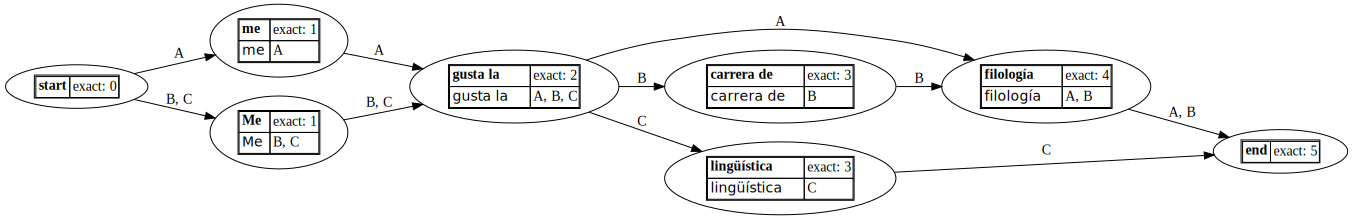

In [ ]:
graph = collate( collation, output="svg" )

In [ ]:
collation = Collation()

In [ ]:
collation.add_plain_witness( "A", "me gusta Santander")
collation.add_plain_witness( "B", "me gusta la ciudad Santander" )
collation.add_plain_witness( "C", "me gusta España" )

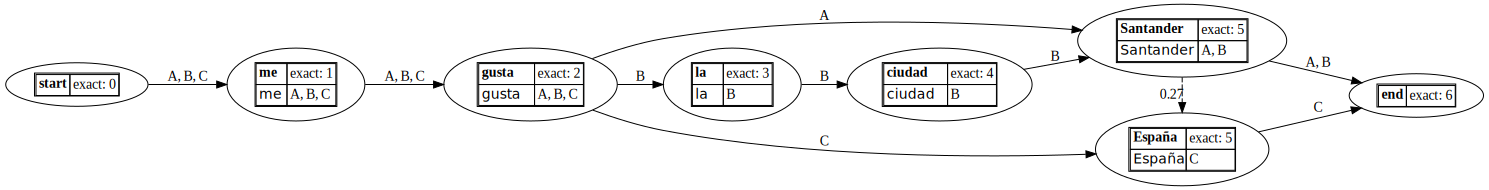

In [ ]:
graph = collate( collation, output="svg", near_match=True, segmentation=False  )

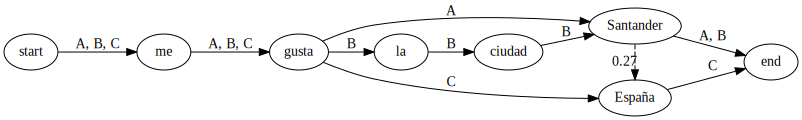

In [ ]:
graph = collate( collation, output="svg_simple", near_match=True, segmentation=False  )